In [4]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import numpy as np
from xgboost import XGBClassifier
from sklearn.tree import  plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMClassifier

In [5]:
from sklearn.calibration import LabelEncoder


bcancer = pd.read_csv('BreastCancer.csv', index_col=0)
lbl = LabelEncoder()
bcancer['Class'] = lbl.fit_transform(bcancer['Class'])

X = bcancer.drop('Class', axis=1)
y = bcancer['Class']

In [6]:
lgbm = LGBMClassifier(random_state=23)

params = {'max_depth':[2, 3, 4, 5, 6, None],'learning_rate': np.linspace(0.001,0.999,10),'n_estimators':[50,100,150]}
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
gcv = GridSearchCV(lgbm, param_grid=params, scoring='neg_log_loss', cv=kfold, n_jobs=8)
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[LightGBM] [Info] Number of positive: 193, number of negative: 367
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000497 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 560, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344643 -> initscore=-0.642672
[LightGBM] [Info] Start training from score -0.642672
[LightGBM] [Info] Number of positive: 193, number of negative: 366
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001159 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 95
[LightGBM] [Info] Number of data points in the train set: 559, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345259 -> initscore=-0.639943
[LightGBM] [Info] Start training from score -0.639943
[CV 5/5] END learning_rate=0.0

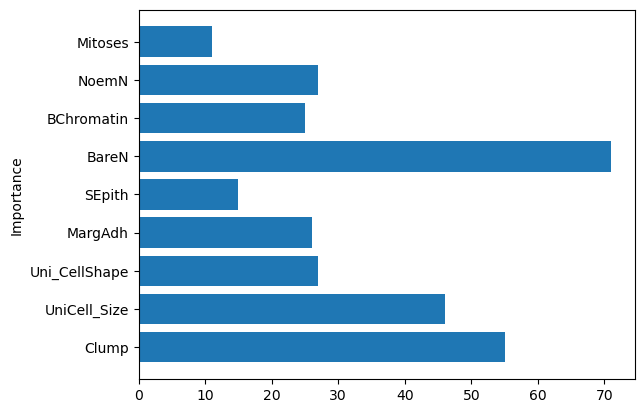

In [7]:
bm_lgbm = gcv.best_estimator_

df_imp = pd.DataFrame({'variable':bm_lgbm.feature_name_, 'importance':bm_lgbm.feature_importances_})
df_imp = df_imp[df_imp['importance']>0.0001]
df_imp.sort_values(by='importance',ascending=True)
plt.barh(df_imp['variable'],df_imp['importance'])
plt.ylabel('Importance')
plt.show()

In [ ]:
xgbm = XGBClassifier(random_state = 23)
params = {'max_depth':[2, 3, 4, 5, 6, None],'learning_rate': np.linspace(0.001,0.999,10),'n_estimators':[50,100,150]}
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
gcv = GridSearchCV(xgbm, param_grid=params, scoring='neg_log_loss', cv=kfold, verbose=3, n_jobs=8)
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)

In [4]:
best_model = gcv.best_estimator_

df_imp = pd.DataFrame({'variable':best_model.feature_names_in_, 'importance':best_model.feature_importances_})
df_imp = df_imp[df_imp['importance']>0.0001]
df_imp.sort_values(by='importance',ascending=True)
plt.barh(df_imp['variable'],df_imp['importance'])
plt.ylabel('Importance')
plt.show()

In [6]:
from sklearn.ensemble import RandomForestClassifier


rf =RandomForestClassifier(random_state=23)
params = {'max_features':[3, 4, 5, 6]}
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
gcv = GridSearchCV(rf, param_grid=params, scoring='neg_log_loss', cv=kfold)
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)

{'max_features': 3}
-0.1008663596688781


In [4]:
from joblib import dump, load
bm =  gcv.best_estimator_
dump(bm,'BCRF.job')

['BCRF.job']

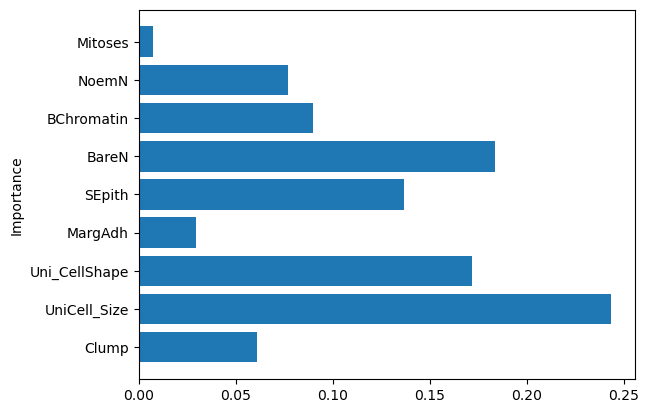

In [7]:
best_model = gcv.best_estimator_

df_imp = pd.DataFrame({'variable':best_model.feature_names_in_, 'importance':best_model.feature_importances_})
df_imp = df_imp[df_imp['importance']>0.0001]
df_imp.sort_values(by='importance',ascending=True)
plt.barh(df_imp['variable'],df_imp['importance'])
plt.ylabel('Importance')
plt.show()

For comparison

In [6]:
from sklearn.tree import DecisionTreeClassifier


dtc =DecisionTreeClassifier(random_state=23)
params = {'max_depth':[3, 4, 5, 6], 'min_samples_split':[2,5,10], 'min_samples_leaf':[1,3,5,7,10,15]}
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
gcv = GridSearchCV(dtc, param_grid=params, scoring='neg_log_loss', cv=kfold)
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 2}
-0.25134111620337896


In [7]:
best_model = gcv.best_estimator_

df_imp = pd.DataFrame({'variable':best_model.feature_names_in_, 'importance':best_model.feature_importances_})
df_imp = df_imp[df_imp['importance']>0.0001]
df_imp.sort_values(by='importance',ascending=True)
plt.barh(df_imp['variable'],df_imp['importance'])
plt.ylabel('Importance')
plt.show()